Importing Libraries 

In [46]:
#Importing all the important libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

Data Preprocessing 

In [47]:
#Loading the dataset 
df = pd.read_csv("car_dataset.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [48]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [49]:
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Handling missing values

In [50]:
#Finding null values 
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [51]:
df['Brand'] = df['Car_Name'].apply(lambda x: x.split()[0])
le = LabelEncoder()
df['Brand_encoded'] = le.fit_transform(df['Brand'])

In [52]:
# Drop unnecessary columns
df.drop(['Car_Name', 'Brand'], axis=1, inplace=True)

In [53]:
# Confirm cleaned data
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Brand_encoded
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,36
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,39
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,18
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,42
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,38


Feature Engineering 

In [54]:
# Convert categorical features to numerical
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

In [55]:
# Create age feature
df['Car_Age'] = 2025 - df['Year']
df.drop('Year', axis=1, inplace=True)

In [56]:
# Separate features and target
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

Exploratory Data Analysis 

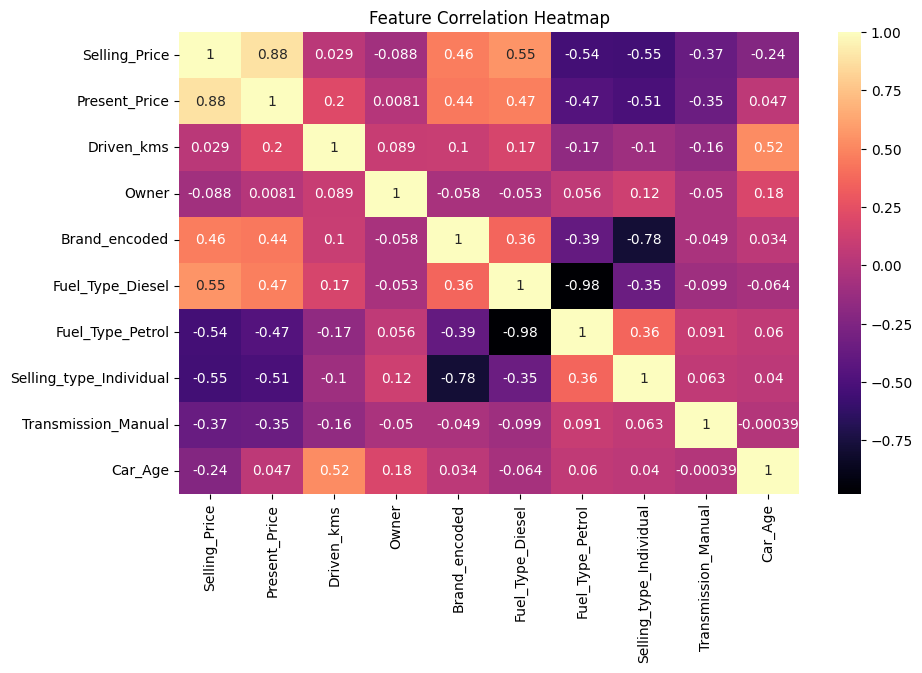

In [57]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='magma')
plt.title("Feature Correlation Heatmap")
plt.show()

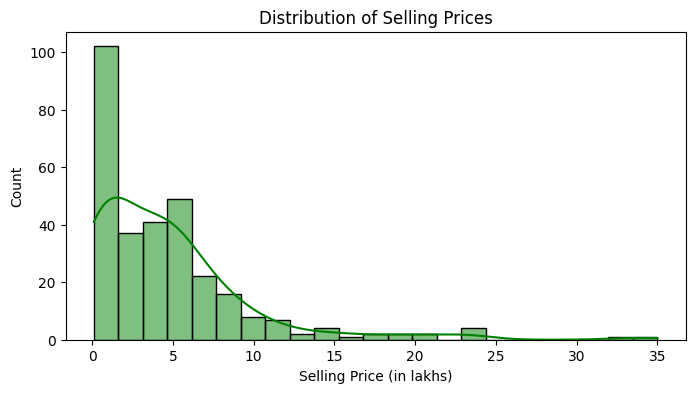

In [58]:
# Distribution of Selling Price
plt.figure(figsize=(8, 4))
sns.histplot(df['Selling_Price'], kde=True, color='green')
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price (in lakhs)")
plt.ylabel("Count")
plt.show()

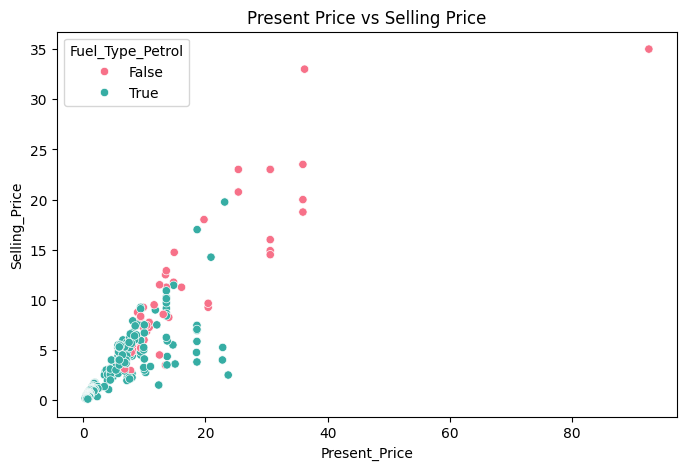

In [59]:
# Price vs Present Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df, hue='Fuel_Type_Petrol',palette="husl")
plt.title("Present Price vs Selling Price")
plt.show()

Data Splitting 

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Model Training 

In [61]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Model Prediction 

In [62]:
y_pred = model.predict(X_test)

Model Evaluation 

In [63]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 3.412209608883901
R² Score: 0.8758035996680809


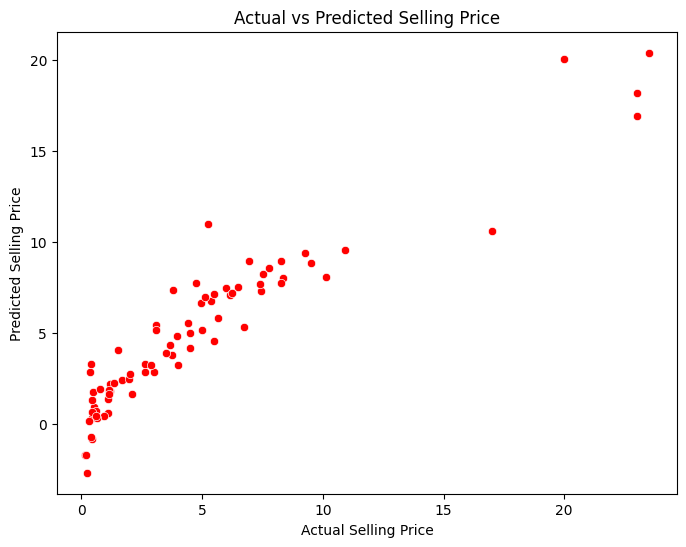

In [64]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color="red")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()

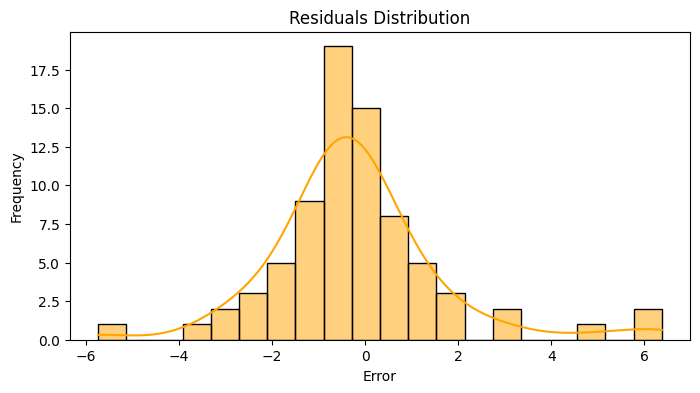

In [65]:
# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=20, kde=True, color='orange')
plt.title("Residuals Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()